In [1]:
import numpy as np
import pandas as pd

In [2]:
#pairplot
df = pd.read_csv("Sustain-energy.csv")
df.head(3)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3632 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3632 non-null   int32  
 1   Year                                                              3632 non-null   int64  
 2   Access to electricity (% of population)                           3632 non-null   float64
 3   Access to clean fuels for cooking                                 3632 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3632 non-null   float64
 5   Financial flows to developing countries (US )                     3632 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3632 non-null   float64
 7   Electricity from fossil fuels (TWh)   

C:\Users\Soham Kishor Walam\AppData\Local\Temp\ipykernel_31300\241330688.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


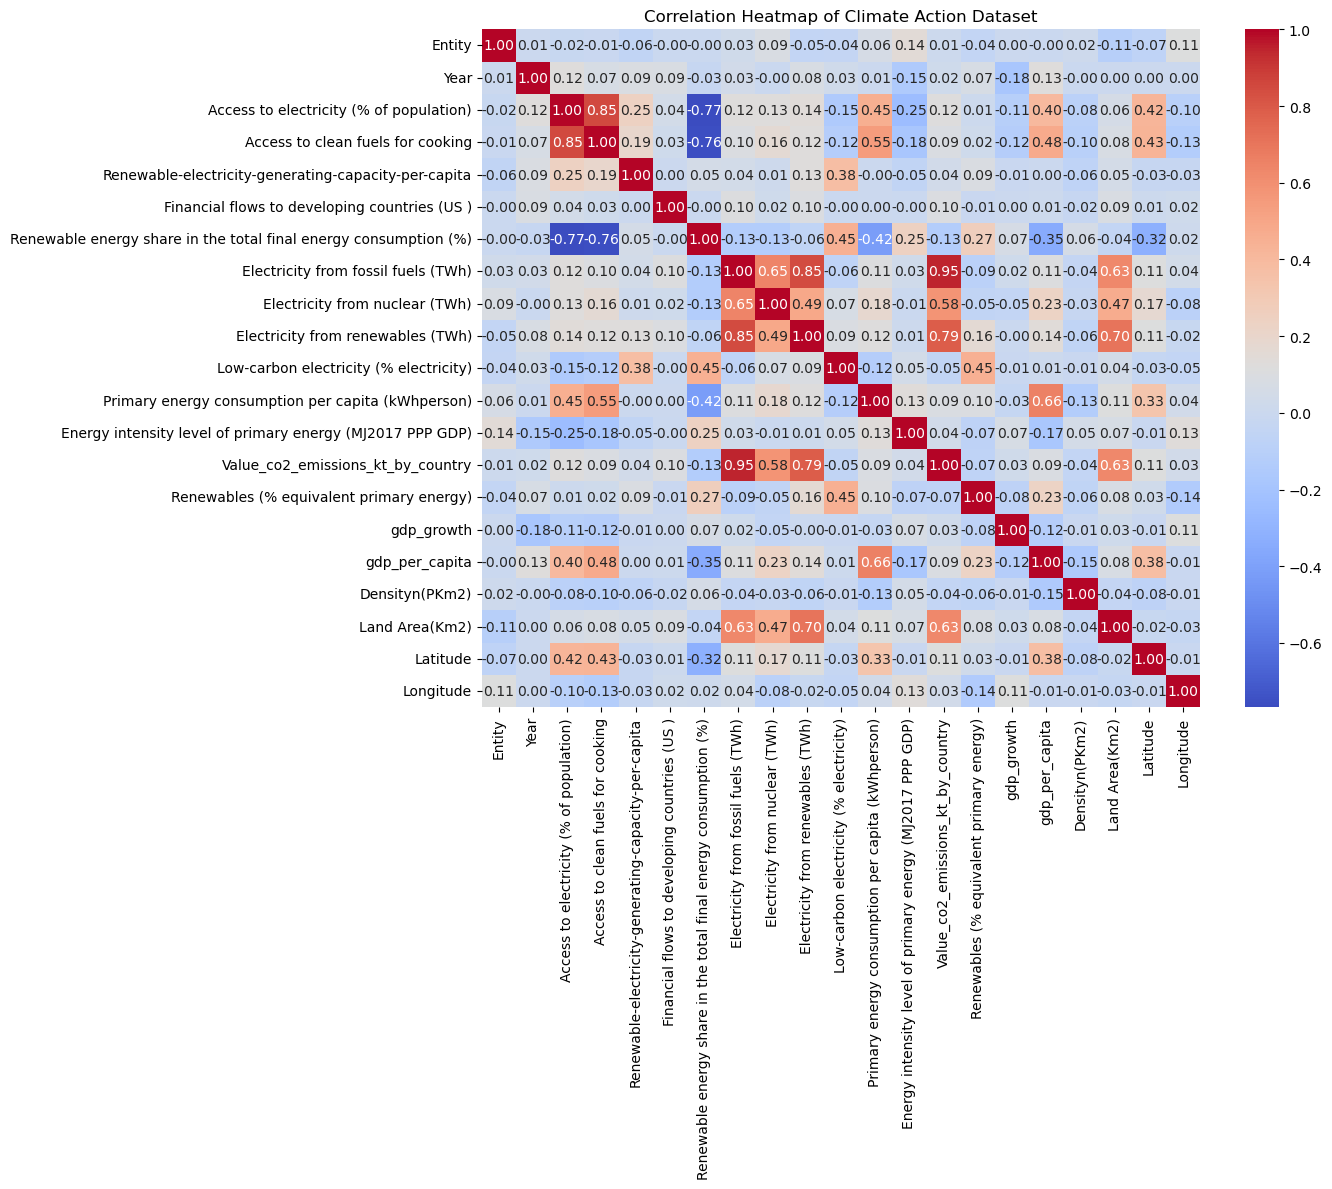

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("Sustain-energy.csv")

# Step 1: Clean column names
df.columns = df.columns.str.replace(r'\n', ' ', regex=True).str.replace(r'[^\w\s%().-]', '', regex=True).str.strip()

# Step 2: Identify and convert non-numeric columns to numeric where appropriate
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Step 3: Handle missing values
# Drop rows with more than 30% missing values
threshold = len(df.columns) * 0.7
df = df.dropna(thresh=threshold)

# Fill remaining numeric missing values with column means
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Step 4: Label Encoding for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 5: Correlation analysis
correlation_matrix = df.corr()

# Step 6: Heatmap visualization
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Climate Action Dataset")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Sustain-energy.csv")

# Clean column names
df.columns = df.columns.str.replace(r'\n', ' ', regex=True).str.replace(r'[^\w\s%().-]', '', regex=True).str.strip()

# Convert non-numeric to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Drop rows with too many nulls
threshold = len(df.columns) * 0.7
df = df.dropna(thresh=threshold)

# Fill missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define target and features (use your desired target column)
target_column = "Value_co2_emissions_kt_by_country"  # example target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


C:\Users\Soham Kishor Walam\AppData\Local\Temp\ipykernel_31300\1448477732.py:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


MAE: 11677.70
MSE: 7269669538.19
RMSE: 85262.36
R² Score: 0.98


Linear Regression Model

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("Sustain-energy.csv")

# Clean column names
df.columns = df.columns.str.replace(r'\n', ' ', regex=True).str.replace(r'[^\w\s%().-]', '', regex=True).str.strip()

# Convert to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Drop rows with many missing values
threshold = len(df.columns) * 0.7
df = df.dropna(thresh=threshold)

# Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Automatically find the best target based on average correlation
corr_matrix = df.corr()
avg_corr = corr_matrix.abs().mean().sort_values(ascending=False)
target = avg_corr.index[1]  # skip index[0] because it's the most correlated with itself

print(f"Selected Target Variable: {target}")

# Define X and y
X = df.drop(columns=[target])
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Simple Linear Regression
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Evaluation
print("\n--- Linear Regression ---")
print(f"MAE: {mean_absolute_error(y_test, lr_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, lr_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, lr_pred):.2f}")

# -------------------------
# XGBoost Regressor
# -------------------------
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# Evaluation
print("\n--- XGBoost Regressor ---")
print(f"MAE: {mean_absolute_error(y_test, xgb_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, xgb_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, xgb_pred):.2f}")


C:\Users\Soham Kishor Walam\AppData\Local\Temp\ipykernel_31300\747667478.py:17: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Selected Target Variable: Access to clean fuels for cooking

--- Linear Regression ---
MAE: 14.02
MSE: 311.15
RMSE: 17.64
R² Score: 0.79

--- XGBoost Regressor ---
MAE: 1.51
MSE: 7.44
RMSE: 2.73
R² Score: 0.99


Target Variable Value Counts:
 Longitude
19.145136     22
67.709953     21
8.468946      21
5.291266      21
165.618042    21
              ..
10.451526     21
29.154857     21
21.005859     14
19.374390     14
31.306979      8
Name: count, Length: 175, dtype: int64


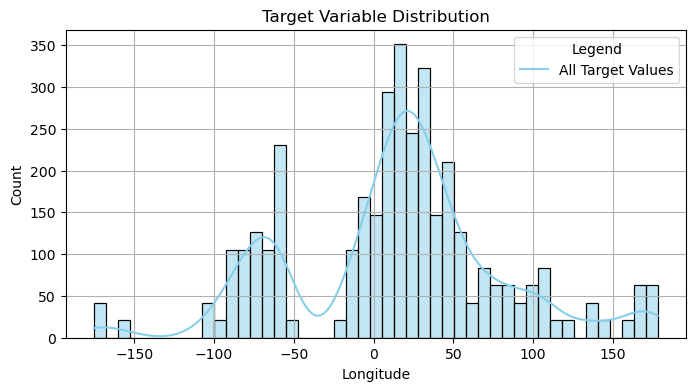


Detected Task Type: Regression

🔍 Regression Metrics:
R² Score: 0.1149
MSE: 3678.4269


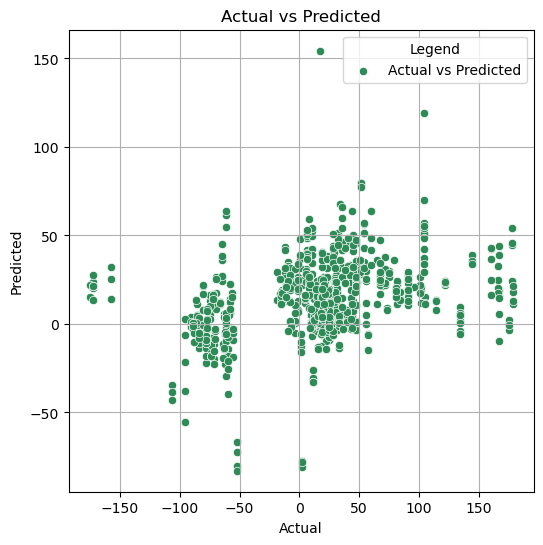

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.patches as mpatches

# Load dataset
df = pd.read_csv("Sustain-energy.csv")

# 1. Drop columns with >40% missing values
threshold = 0.4
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=cols_to_drop, inplace=True)

# 2. Identify target column (last column after drop)
target_column = df.columns[-1]

# 3. Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype(str)
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 4. Fill remaining missing values with median
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# 5. Target variable analysis
print("Target Variable Value Counts:\n", df_imputed[target_column].value_counts())

# ➤ Plot target variable distribution with custom legend
plt.figure(figsize=(8, 4))
sns.histplot(df_imputed[target_column], kde=True, color='skyblue', label="Target Values")
plt.title("Target Variable Distribution")
plt.xlabel(target_column)
plt.legend(title="Legend", loc='upper right', labels=["All Target Values"])
plt.grid(True)
plt.show()

# 6. Split into features and target
X = df_imputed.drop(columns=[target_column])
y = df_imputed[target_column]

# 7. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Determine task type
task_type = 'classification' if y.nunique() < 10 else 'regression'
print(f"\nDetected Task Type: {task_type.capitalize()}")

# 10. Train & Evaluate Models
if task_type == 'regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print regression metrics
    print("\n🔍 Regression Metrics:")
    print("R² Score:", round(r2_score(y_test, y_pred), 4))
    print("MSE:", round(mean_squared_error(y_test, y_pred), 4))

    # ➤ Plot regression results with custom legend
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='seagreen', label="Predicted Points")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.legend(title="Legend", labels=["Actual vs Predicted"])
    plt.grid(True)
    plt.show()

else:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print classification metrics
    print("\n🔍 Classification Metrics:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # ➤ Plot confusion matrix with custom legend
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    plt.title("Confusion Matrix")

    # Custom legend for confusion matrix (edit if needed)
    custom_legend = [
        mpatches.Patch(color='lightblue', label='True Negative'),
        mpatches.Patch(color='blue', label='True Positive'),
        mpatches.Patch(color='white', label='False Negative'),
        mpatches.Patch(color='darkblue', label='False Positive')
    ]
    plt.legend(handles=custom_legend, title="Legend", loc='upper right')
    plt.show()


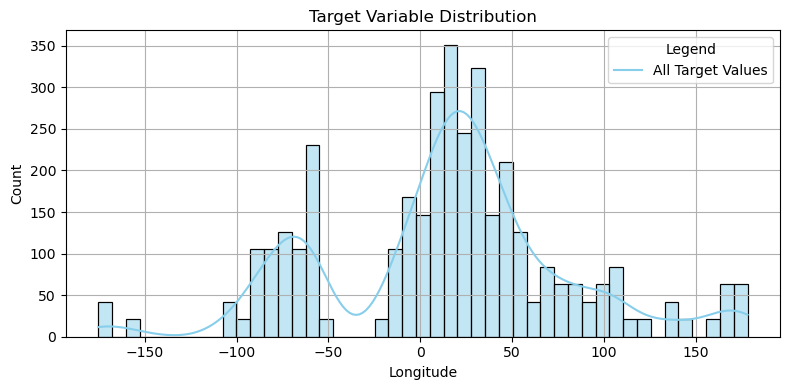

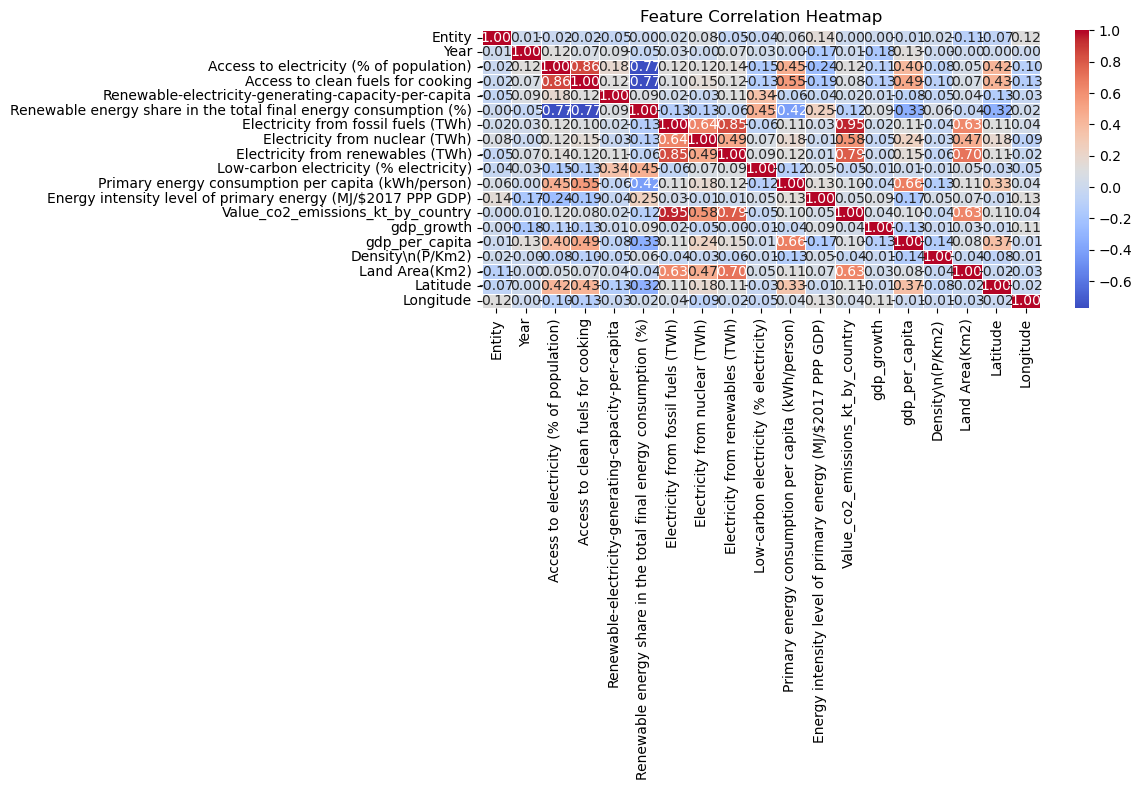

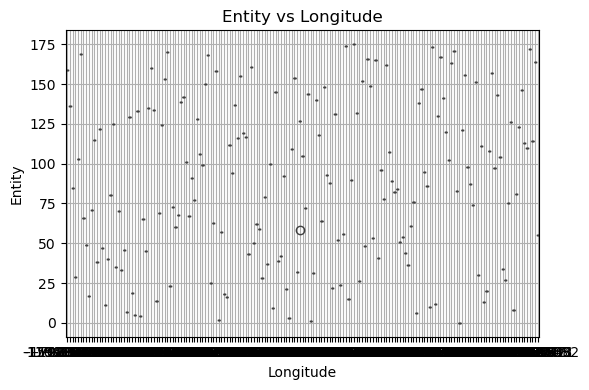

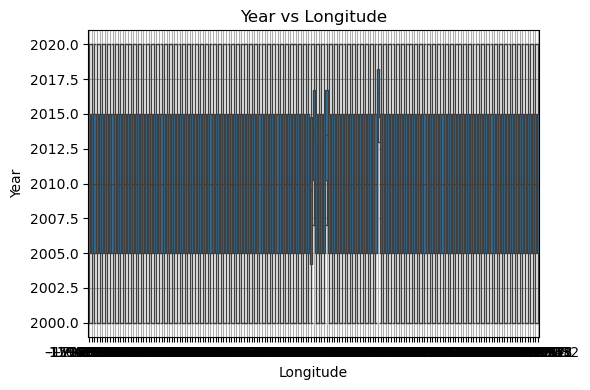

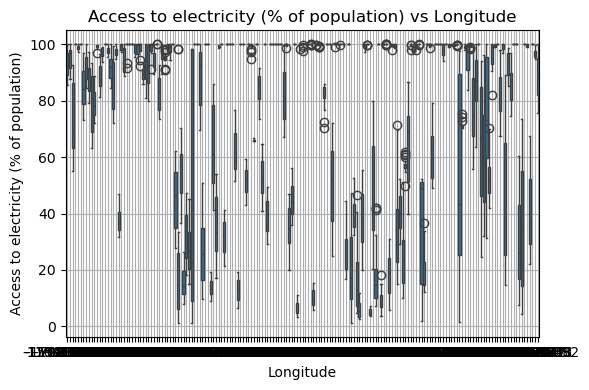

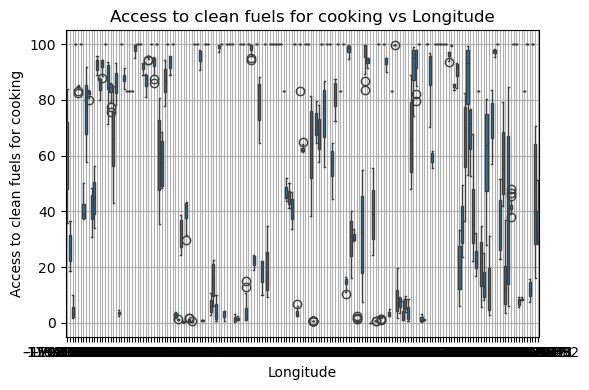

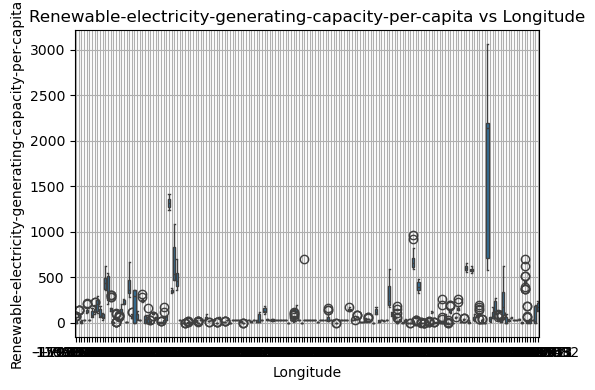

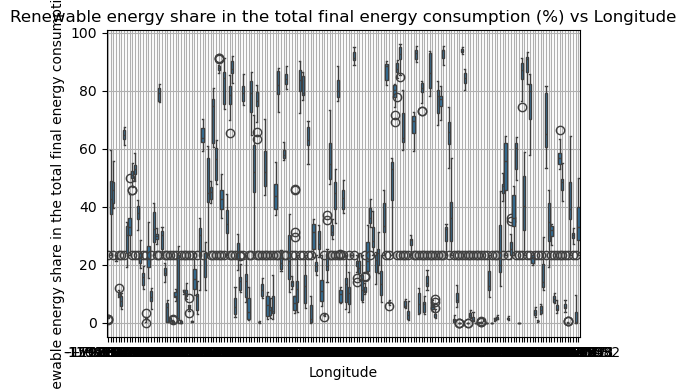

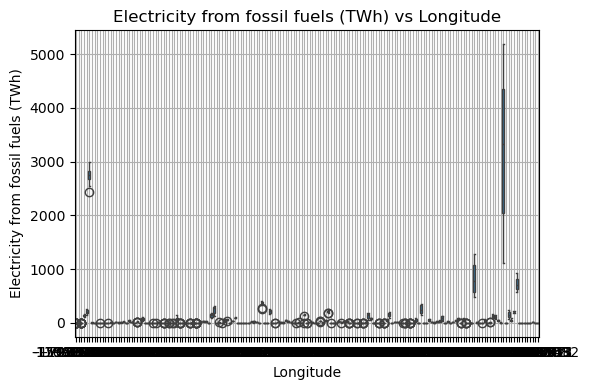

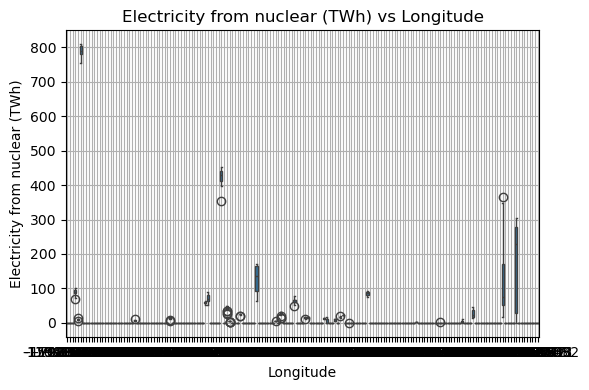

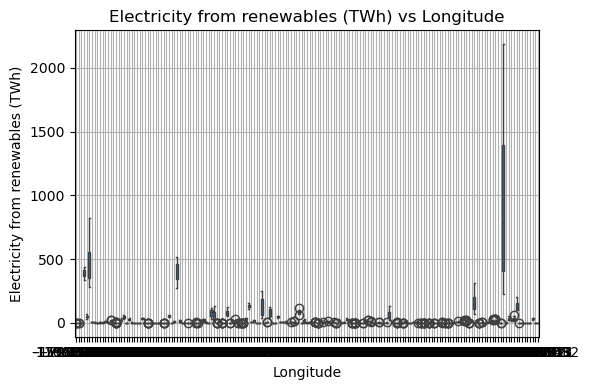

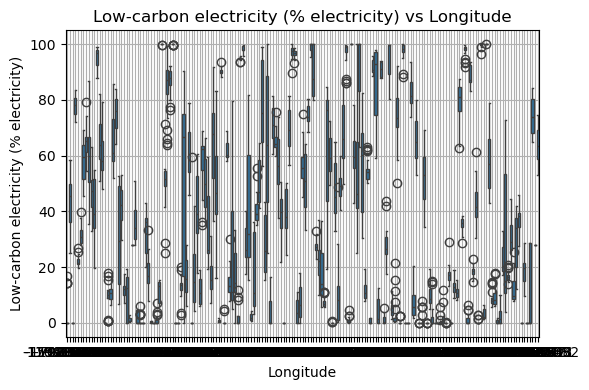

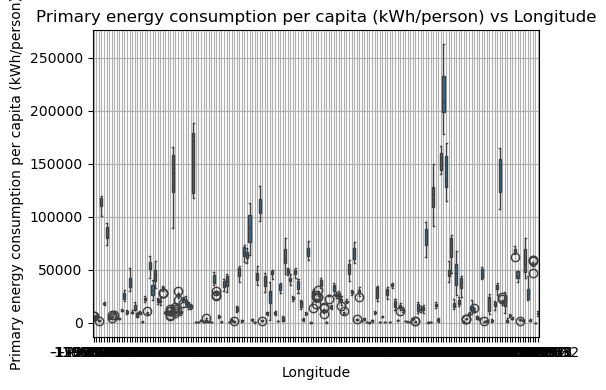

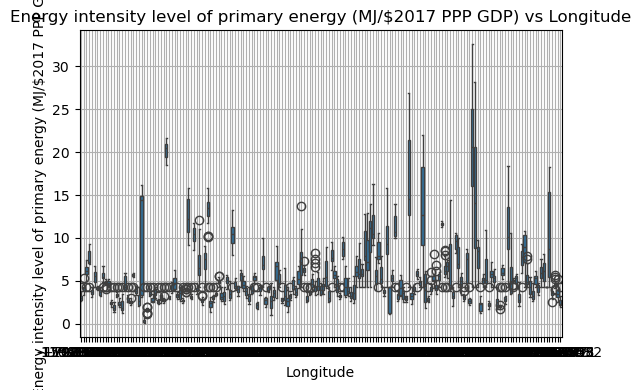

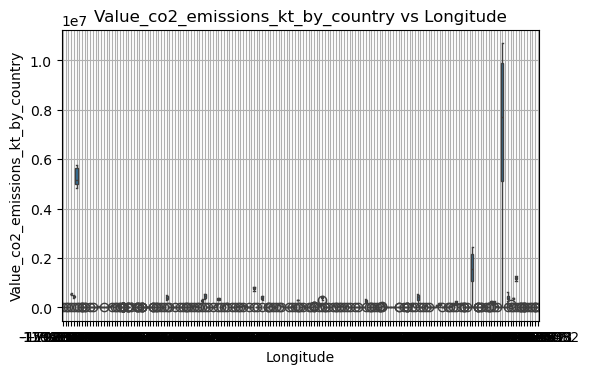

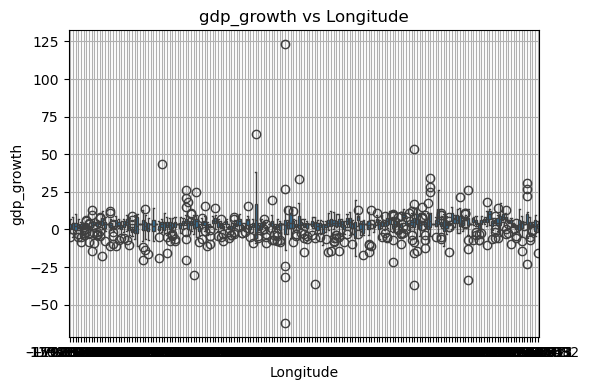

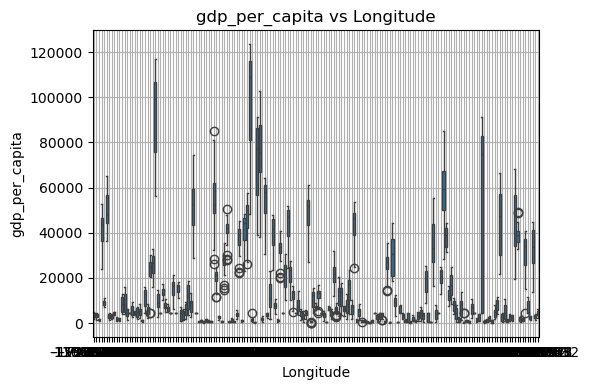

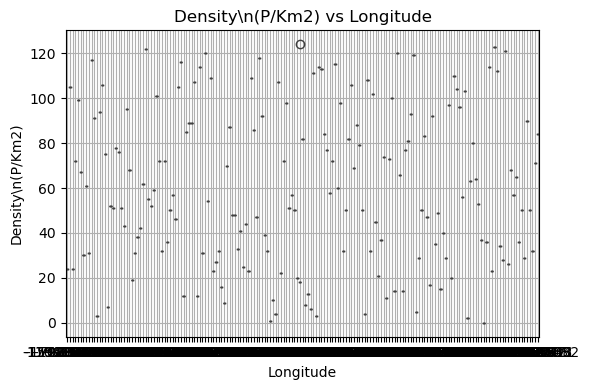

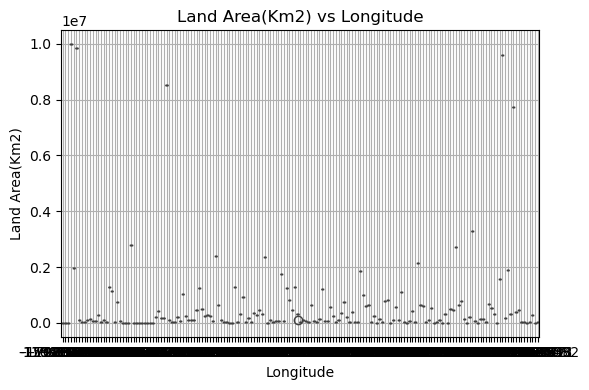

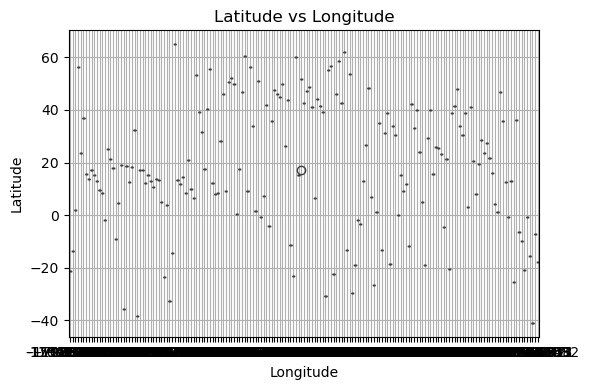


🔍 Regression Metrics:
R² Score: 0.1149
MSE: 3678.4269


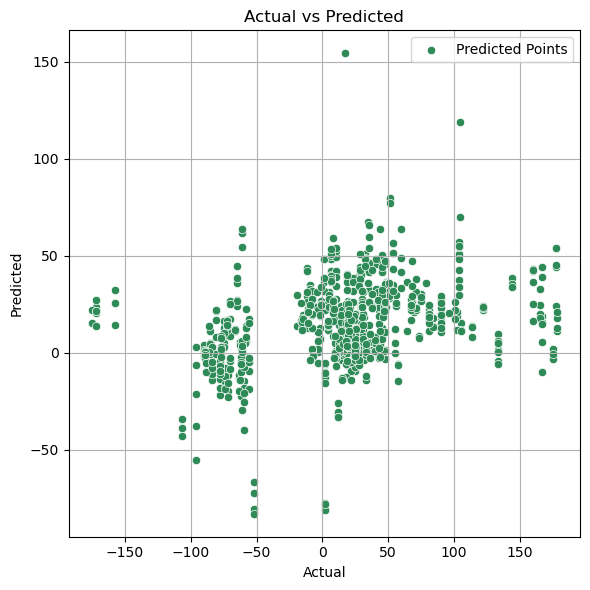

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.patches as mpatches

# Load dataset
df = pd.read_csv("Sustain-energy.csv")

# Drop columns with >40% missing values
threshold = 0.4
cols_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=cols_to_drop, inplace=True)

# Identify target column (last column after drop)
target_column = df.columns[-1]

# Encode categorical columns
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype(str)
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Fill remaining missing values with median
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Target Variable Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_imputed[target_column], kde=True, color='skyblue', label="Target Values")
plt.title("Target Variable Distribution")
plt.xlabel(target_column)
plt.legend(title="Legend", loc='upper right', labels=["All Target Values"])
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Boxplot of Features vs Target
for column in df_imputed.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_imputed[target_column], y=df_imputed[column])
    plt.title(f"{column} vs {target_column}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# World map visualization for CO2 emissions (if 'Country' and 'CO2 Emission' columns exist)
world_map = None
if "Country" in df.columns and "CO2 Emission" in df.columns:
    try:
        df_map = df[["Country", "CO2 Emission"]].copy()
        df_map = df_map.groupby("Country").mean().reset_index()
        world_map = px.choropleth(df_map,
                                  locations="Country",
                                  locationmode="country names",
                                  color="CO2 Emission",
                                  color_continuous_scale="YlOrRd",
                                  title="🌍 Average CO₂ Emissions by Country")
        world_map.show()
    except Exception as e:
        print("Map visualization error:", e)

# Model training setup
X = df_imputed.drop(columns=[target_column])
y = df_imputed[target_column]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
task_type = 'classification' if y.nunique() < 10 else 'regression'

# Model training & evaluation
if task_type == 'regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n🔍 Regression Metrics:")
    print("R² Score:", round(r2_score(y_test, y_pred), 4))
    print("MSE:", round(mean_squared_error(y_test, y_pred), 4))

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='seagreen', label="Predicted Points")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n🔍 Classification Metrics:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    disp.plot()
    plt.title("Confusion Matrix")
    plt.show()


In [20]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.patches as mpatches
import io
import base64

# Load Dash
app = dash.Dash(__name__)
server = app.server  # for deployment if needed

# Load worldometer data
world_df = pd.read_csv('Sustain-energy.csv')

# Load sustainability dataset
sustain_df = pd.read_csv("Sustain-energy.csv")

# --- CLEANING AND PREPROCESSING (for analytics and CO₂ map) ---
threshold = 0.4
cols_to_drop = sustain_df.columns[sustain_df.isnull().mean() > threshold]
sustain_df.drop(columns=cols_to_drop, inplace=True)
target_column = sustain_df.columns[-1]

# Encode categorical columns
df_encoded = sustain_df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype(str)
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Fill missing values
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Preprocess for modeling
X = df_imputed.drop(columns=[target_column])
y = df_imputed[target_column]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
task_type = 'classification' if y.nunique() < 10 else 'regression'

# Train model
if task_type == 'regression':
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred), 4)
    mse = round(mean_squared_error(y_test, y_pred), 4)
    model_metrics = f"R² Score: {r2}, MSE: {mse}"
else:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred), 4)
    model_metrics = f"Accuracy: {acc}"

# Create CO₂ Emissions World Map (if possible)
co2_map_figure = {}
if "Country" in sustain_df.columns and "CO2 Emission" in sustain_df.columns:
    df_map = sustain_df[["Country", "CO2 Emission"]].copy()
    df_map = df_map.groupby("Country").mean().reset_index()
    co2_map_figure = px.choropleth(
        df_map,
        locations="Entity",
        locationmode="Entity",
        color="Value_co2_emissions_kt_by_country",
        color_continuous_scale="YlOrRd",
        title="🌍 Average CO₂ Emissions by Country"
    )

# --- DASH LAYOUT ---
app.layout = html.Div([
    html.H1("🌍 Global & Sustainability Data Dashboard", style={'textAlign': 'center'}),

    dcc.Tabs(id="tabs", value='tab1', children=[
        dcc.Tab(label='COVID & Population Data', value='tab1'),
        dcc.Tab(label='Sustainability Analysis', value='tab2'),
        dcc.Tab(label='CO₂ Emissions Map', value='tab3'),
    ]),

    html.Div(id='tabs-content')
])

# --- CALLBACKS ---
@app.callback(
    Output('tabs-content', 'children'),
    Input('tabs', 'value')
)
def render_content(tab):
    if tab == 'tab1':
        return html.Div([
            html.H3("Country-wise Active Cases and Deaths"),
            dcc.Dropdown(
                id='country-dropdown',
                options=[{'label': country, 'value': country} for country in world_df['Entity']],
                placeholder="Select a country"
            ),
            html.Button('Show Data', id='show-button', n_clicks=0),
            html.Div(id='output-container'),
            dcc.Graph(id='world-map')
        ])
    
    elif tab == 'tab2':
        return html.Div([
            html.H3("📊 Sustainability Model Insights"),
            html.P("Target Column: " + target_column),
            html.P("Model Type: " + task_type.capitalize()),
            html.P("Metrics: " + model_metrics),
            html.P("Correlation Heatmap and Feature Boxplots were generated in preprocessing.")
        ])
    
    elif tab == 'tab3':
        return html.Div([
            html.H3("🌍 CO₂ Emissions Choropleth Map"),
            dcc.Graph(figure=co2_map_figure)
        ])

@app.callback(
    Output('output-container', 'children'),
    Output('world-map', 'figure'),
    Input('show-button', 'n_clicks'),
    Input('country-dropdown', 'value')
)
def update_output(n_clicks, selected_country):
    if n_clicks > 0 and selected_country:
        population = world_df.loc[world_df['Entity'] == selected_country, 'Value_co2_emissions_kt_by_country'].values[0]
        total_deaths = world_df.loc[world_df['Entity'] == selected_country, 'gdp_per_capita'].values[0]
        data_message = f"Country: {selected_country} | CO2 Emissions: {population} | GDP per capita: {total_deaths}"

        fig = px.choropleth(
            world_df,
            locations='Entity',
            locationmode='Entity',
            color='Value_co2_emissions_kt_by_country',
            hover_name='Entity',
            hover_data=['Value_co2_emissions_kt_by_country'],
            color_continuous_scale=px.colors.sequential.Plasma,
            title='World Map: Active CO2 Emissions by Country'
        )

        if selected_country in world_df['Entity'].values:
            selected_trace = px.choropleth(
                world_df[world_df['Entity'] == selected_country],
                locations='Entity',
                locationmode='Entity',
                color='Value_co2_emissions_kt_by_country',
                color_continuous_scale=['lightgrey', 'red']
            ).data[0]
            fig.add_trace(selected_trace)

        fig.update_layout(width=1000, height=600)
        return data_message, fig

    return "Select a country and press 'Show Data'", {}

# --- RUN SERVER ---
if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[20], line 140, in update_output(
    n_clicks=1,
    selected_country='Austria'
)
    137 total_deaths = world_df.loc[world_df['Entity'] == selected_country, 'gdp_per_capita'].values[0]
    138 data_message = f"Country: {selected_country} | CO2 Emissions: {population} | GDP per capita: {total_deaths}"
--> 140 fig = px.choropleth(
        px = <module 'plotly.express' from 'c:\\Users\\Soham Kishor Walam\\anaconda3\\Lib\\site-packages\\plotly\\express\\__init__.py'>
        world_df =            Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghan